In [1]:
import xarray as xr
import numpy as np


In [2]:
ds  = xr.open_mfdataset('/glade/scratch/jcaron/archive/PPT/100km/3hrly*.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 52592, lat: 192, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T01:00:00 ... 2018-12-31T22:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    date     (time) int32 dask.array<chunksize=(248,), meta=np.ndarray>
    PRECT    (time, lat, lon) float32 dask.array<chunksize=(248, 192, 288), meta=np.ndarray>

In [17]:
ppt_loc = ds['PRECT'].sel(lat=slice(-10,10), lon=slice(120,180))

In [18]:
ppt_loc = ppt_loc.compute()

In [19]:
ppt_loc

<xarray.DataArray 'PRECT' (time: 52592, lat: 22, lon: 49)>
array([[[1.33058347e-03, 1.70406315e-03, 2.19811313e-03, ...,
         5.67098707e-02, 2.73008905e-02, 3.85002121e-02],
        [3.31700314e-03, 2.22787232e-04, 0.00000000e+00, ...,
         7.56685482e-03, 1.68521944e-02, 2.68728994e-02],
        [0.00000000e+00, 2.81062676e-03, 4.15213690e-05, ...,
         6.60404116e-02, 5.29220888e-05, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 1.80196892e-02, ...,
         4.00900654e-03, 4.10264218e-03, 2.96472863e-04],
        [0.00000000e+00, 1.07177384e-02, 3.08888238e-02, ...,
         1.24877848e-01, 2.22178563e-01, 1.16246149e-01],
        [1.14630710e-03, 1.05397806e-01, 1.05919331e-04, ...,
         1.54347606e-02, 2.90211681e-02, 2.55556136e-01]],

       [[3.93760683e-06, 3.70490691e-03, 3.14198472e-02, ...,
         2.39733774e-02, 3.74078080e-02, 4.58406843e-02],
        [5.46059385e-03, 3.16841906e-04, 0.00000000e+00, ...,
         5.69379990e-05, 6.34945137e-03, 2.17640446e-03],
        [0.00000000e+00, 1.31632220e-02, 2.00447364e-04, ...,
         1.83469076e-02, 1.94864799e-04, 0.00000000e+00],
...
        [2.89809048e-01, 1.61028281e-02, 2.95675476e-03, ...,
         5.02342498e-03, 1.79582494e-04, 0.00000000e+00],
        [2.39702476e-05, 0.00000000e+00, 2.94563710e-04, ...,
         3.97135410e-03, 7.26281287e-05, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.56909742e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[9.27121714e-02, 1.06257245e-01, 1.77508295e-01, ...,
         1.60619640e+00, 7.44333625e-01, 1.90669119e-01],
        [2.05087200e-01, 1.33750200e-01, 1.12658054e-01, ...,
         7.74944782e-01, 5.43104112e-01, 5.51708877e-01],
        [8.52729142e-01, 8.77224922e-01, 1.47362635e-01, ...,
         6.37989163e-01, 1.47177970e+00, 7.16019452e-01],
        ...,
        [1.09674585e+00, 5.92946820e-03, 4.03481536e-03, ...,
         2.46391781e-02, 7.13152392e-03, 2.55668559e-03],
        [2.72628444e-04, 1.13454962e-06, 2.79976483e-02, ...,
         6.16302621e-03, 1.61112507e-03, 2.99099064e-03],
        [0.00000000e+00, 5.27808152e-04, 5.82813993e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T01:00:00 ... 2018-12-31T22:00:00
  * lat      (lat) float64 -9.895 -8.953 -8.01 -7.068 ... 7.068 8.01 8.953 9.895
  * lon      (lon) float64 120.0 121.2 122.5 123.8 ... 176.2 177.5 178.8 180.0

In [25]:
h, edg = np.histogram(ppt_loc, bins=np.linspace(0, 100, 50))

In [26]:
h

array([54453904,  1397388,   428604,   180447,    89899,    50346,
          30346,    19031,    12722,     8610,     6005,     4302,
           3200,     2378,     1689,     1263,      924,      678,
            576,      425,      351,      278,      192,      134,
            104,       92,       70,       64,       38,       29,
             32,       13,       11,        3,        4,        6,
              7,        3,        1,        3,        2,        0,
              1,        0,        0,        0,        0,        0,
              0])

In [10]:
import matplotlib.pyplot as plt

[]

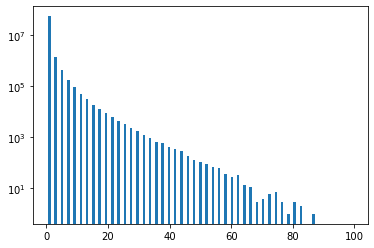

In [30]:
fig, ax = plt.subplots()

ctr = edg[0:-1] + 0.5*np.diff(edg)

ax.bar(ctr, h)

ax.semilogy()